# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "metric"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data 
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | udachnyy
Processing Record 3 of Set 1 | kendari
Processing Record 4 of Set 1 | ambon
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | mayo
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 17 of Set 1 | gimli
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | gambela
Processing Record 21 of Set 1 | 

Processing Record 32 of Set 4 | talnakh
Processing Record 33 of Set 4 | karratha
Processing Record 34 of Set 4 | uyuni
Processing Record 35 of Set 4 | point pleasant
Processing Record 36 of Set 4 | boa vista
Processing Record 37 of Set 4 | yellowknife
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | stykkisholmur
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | along
Processing Record 43 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 44 of Set 4 | tessalit
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | westport
Processing Record 47 of Set 4 | pekalongan
Processing Record 48 of Set 4 | lavrentiya
Processing Record 49 of Set 4 | scottsbluff
Processing Record 0 of Set 5 | bourail
Processing Record 1 of Set 5 | kodiak
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | halalo
City not found. Skipping...
Processing Record 4 of Set 5 |

Processing Record 22 of Set 8 | shache
Processing Record 23 of Set 8 | mlonggo
Processing Record 24 of Set 8 | marcona
City not found. Skipping...
Processing Record 25 of Set 8 | olafsvik
Processing Record 26 of Set 8 | okhotsk
Processing Record 27 of Set 8 | festus
Processing Record 28 of Set 8 | jalu
Processing Record 29 of Set 8 | izhma
Processing Record 30 of Set 8 | ponta do sol
Processing Record 31 of Set 8 | juneau
Processing Record 32 of Set 8 | chacabuco
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | klaksvik
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | amapa
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | kamenka
Processing Record 39 of Set 8 | san carlos
Processing Record 40 of Set 8 | pirgos
Processing Record 41 of Set 8 | anloga
Processing Record 42 of Set 8 | kachug
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | dhidhdhoo
Processing Recor

Processing Record 10 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 11 of Set 12 | port macquarie
Processing Record 12 of Set 12 | foam lake
Processing Record 13 of Set 12 | kemi
Processing Record 14 of Set 12 | atar
Processing Record 15 of Set 12 | sokoto
Processing Record 16 of Set 12 | linqiong
Processing Record 17 of Set 12 | takoradi
Processing Record 18 of Set 12 | dhanera
Processing Record 19 of Set 12 | omsukchan
Processing Record 20 of Set 12 | wewak
Processing Record 21 of Set 12 | teya
Processing Record 22 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 23 of Set 12 | mier
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | johi
Processing Record 26 of Set 12 | qasigiannguit
Processing Record 27 of Set 12 | porto empedocle
Processing Record 28 of Set 12 | neiafu
Processing Record 29 of Set 12 | nicoya
Processing Record 30 of Set 12 | isfana
Processing Record 31 of Set 12 | svetlogorsk
Processing Record 32 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,5.03,54,95,2.22,US,1675637682
1,udachnyy,66.4167,112.4000,-34.20,73,98,0.69,RU,1675637889
2,kendari,-3.9450,122.4989,25.58,88,100,1.23,ID,1675637889
3,ambon,-3.6954,128.1814,26.08,89,40,1.54,ID,1675637890
4,rikitea,-23.1203,-134.9692,26.17,74,3,6.78,PF,1675637890


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.03,54,95,2.22,US,1675637682
1,udachnyy,66.4167,112.4000,-34.20,73,98,0.69,RU,1675637889
2,kendari,-3.9450,122.4989,25.58,88,100,1.23,ID,1675637889
3,ambon,-3.6954,128.1814,26.08,89,40,1.54,ID,1675637890
4,rikitea,-23.1203,-134.9692,26.17,74,3,6.78,PF,1675637890


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

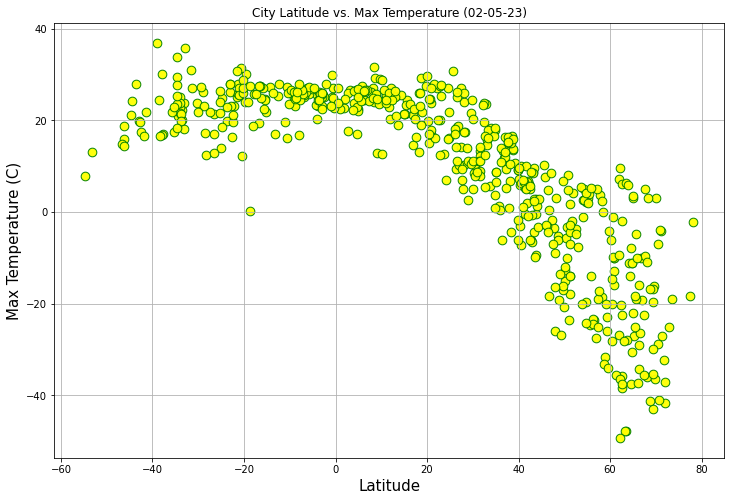

In [56]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"],alpha=0.95, c="yellow", edgecolors="green", s=75)

# Incorporate the other graph properties

plt.title(f"City Latitude vs. {'Max Temperature'} ({time.strftime('%m-%d-%y')})")
plt.xlabel("Latitude", fontsize = 15)
plt.ylabel("Max Temperature (C)", fontsize = 15)

plt.grid()        
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

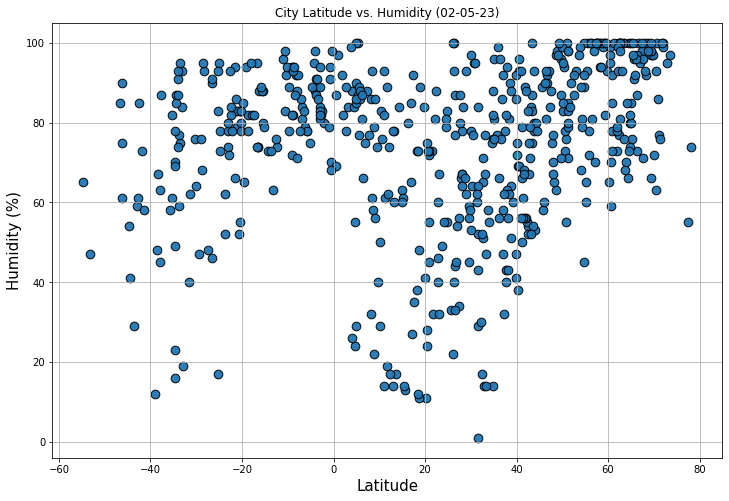

In [53]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.95, edgecolors="black", s=75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. {'Humidity'} ({time.strftime('%m-%d-%y')})")
plt.xlabel("Latitude", fontsize = 15) 
plt.ylabel("Humidity (%)", fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

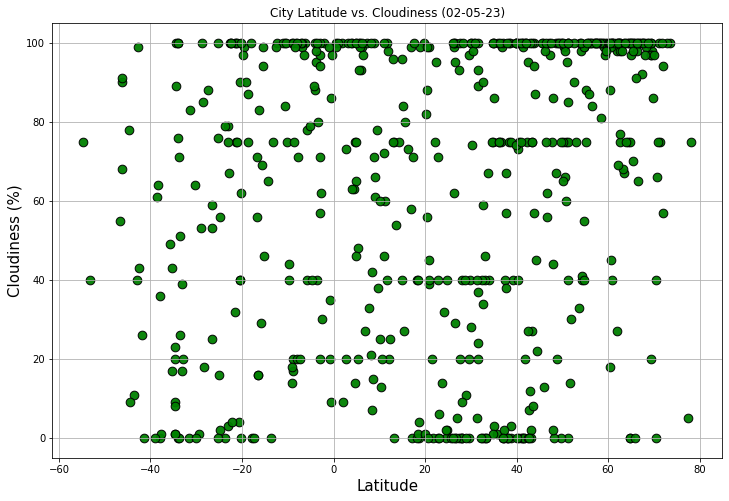

In [54]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],alpha=0.95, c="green", edgecolors="black", s=75)

# Incorporate the other graph properties

plt.title(f"City Latitude vs. {'Cloudiness'} ({time.strftime('%m-%d-%y')})")
plt.xlabel("Latitude", fontsize = 15) 
plt.ylabel("Cloudiness (%)", fontsize = 15)
plt.grid()
          
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

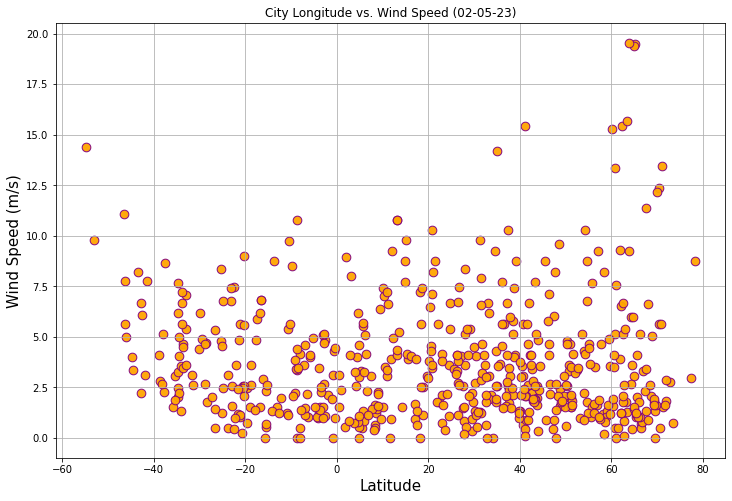

In [55]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.95, c="orange", edgecolors="purple", s=75)

# Incorporate the other graph properties
plt.title(f"City Longitude vs. {'Wind Speed'} ({time.strftime('%m-%d-%y')})")
plt.xlabel("Latitude", fontsize=15) 
plt.ylabel("Wind Speed (m/s)", fontsize=15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regr_x, regr_y, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is: {rvalue}')
    plt.annotate(line_eq, (regr_x, regr_y), fontsize=15, color="red")
    plt.xlabel(f"{x_label}")
    plt.ylabel(f"{y_label}")
   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.03,54,95,2.22,US,1675637682
1,udachnyy,66.4167,112.4000,-34.20,73,98,0.69,RU,1675637889
5,hasaki,35.7333,140.8333,1.22,77,1,3.64,JP,1675637682
8,tuktoyaktuk,69.4541,-133.0374,-43.00,66,20,0.00,CA,1675637891
10,mayo,38.8876,-76.5119,13.49,64,0,4.12,US,1675637892


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kendari,-3.9450,122.4989,25.58,88,100,1.23,ID,1675637889
3,ambon,-3.6954,128.1814,26.08,89,40,1.54,ID,1675637890
4,rikitea,-23.1203,-134.9692,26.17,74,3,6.78,PF,1675637890
6,ushuaia,-54.8000,-68.3000,7.79,65,75,14.40,AR,1675637681
7,busselton,-33.6500,115.3333,20.07,75,26,4.64,AU,1675637891


###  Temperature vs. Latitude Linear Regression Plot

The r-square is: -0.8491460443659223


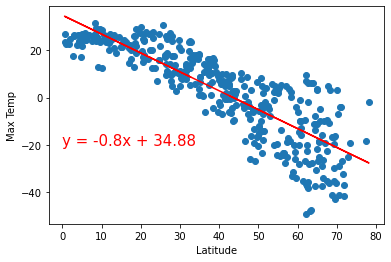

In [38]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

regr_x = 0
regr_y = -20
x_label = "Latitude"
y_label = "Max Temp"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

The r-square is: 0.3270342914405019


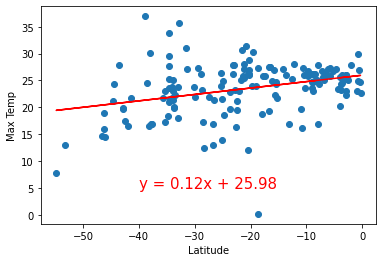

In [40]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

regr_x = -40
regr_y = 5
x_label = "Latitude"
y_label = "Max Temp"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

**Discussion about the linear relationship**: In the Northern Hemisphere, the further away we go from the equator, the colder it gets. In the Southern Hemisphere, we see the same trend. Based on our data, we can confirm that it gets hotter as we approah the equator! 

### Humidity vs. Latitude Linear Regression Plot

The r-square is: 0.41452160056638493


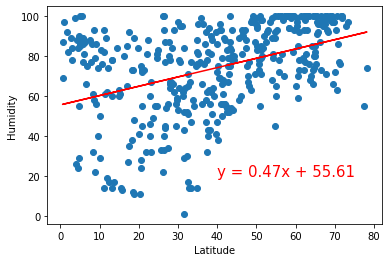

In [43]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

regr_x = 40
regr_y = 20
x_label = "Latitude"
y_label = "Humidity"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

The r-square is: 0.47984458325392615


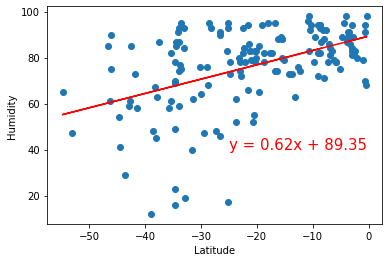

In [45]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

regr_x = -25
regr_y = 40
x_label = "Latitude"
y_label = "Humidity"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

**Discussion about the linear relationship:** Data shows that there is no correlation between humidity and the distance to the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is: 0.25775238584359234


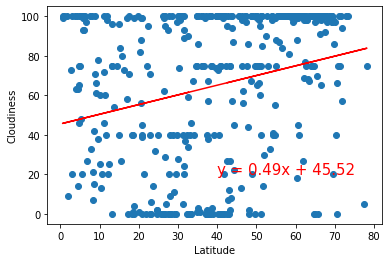

In [48]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

regr_x = 40
regr_y = 20
x_label = "Latitude"
y_label = "Cloudiness"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

The r-square is: 0.2914234731568211


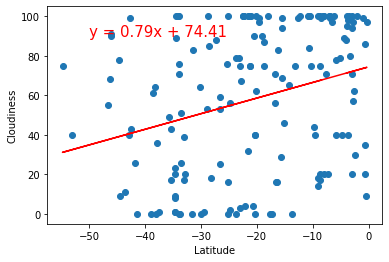

In [49]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

regr_x = -50
regr_y = 90
x_label = "Latitude"
y_label = "Cloudiness"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

**Discussion about the linear relationship:** Data shows that there is no correlation between cloudiness and the distance to the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is: 0.05461500226593238


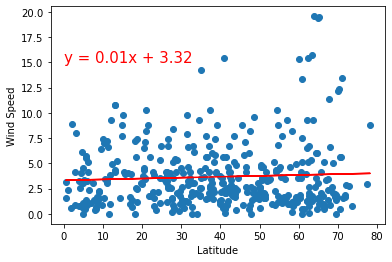

In [50]:
# Northern Hemisphere
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

regr_x = 0
regr_y = 15
x_label = "Latitude"
y_label = "Wind Speed"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

The r-square is: -0.37930403270623547


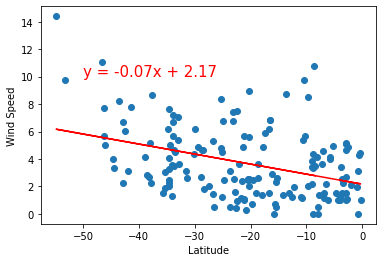

In [51]:
# Southern Hemisphere
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

regr_x = -50
regr_y = 10
x_label = "Latitude"
y_label = "Wind Speed"

linearRegression(x_values, y_values, regr_x, regr_y, x_label, y_label)
plt.show()

**Discussion about the linear relationship:** Data shows that there is no correlation between wind speed and the distance to the equator. 